# Phase 1 Milestone 2

_Milestone ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khusus pada Phase 1._

# 1. Perkenalan

Nama: Sri Wahyuni

Batch: FTDS-016-RMT

### Dataset

Dataset yang digunakan pada project ini adalah dataset yang diperoleh dari `kaggle` dengan nama `pet_score_record_2022`. [klik disini](https://www.kaggle.com/datasets/ippudkiippude/pet-store-records-2020) untuk langsung menuju dataset.

### Latar Belakang

Pet shop merupakan salah satu tempat untuk menjual hewan peliharaan beserta peralatan dan perlengkapan untuk pemeliharaan hewan. Peralatan merupakan barang-barang yang cenderung wajib untuk dimiliki oleh para pemilik hewan peliharaan, sedangkan perlengkapan merupakan barang-barang yang tidak wajib dimiliki oleh para pemilik hewan atau hanya berupa barang-barang aksesoris untuk hewan. Peralatan pastinya akan habis dipakai hal ini dapat menjadi peluang supaya konsumen menjadi pelanggan atau membeli produk kembali.

### Problem Statement



Prediksi apakah konsumen akan melakukan pembelian ulang atau tidak berdasarkan data yang sudah diperoleh

### Penjabaran Masalah

- Berapa persen tingkat konsumen melakukan pembelian ulang?
- Kategori produk apa yang paling diminati?
- Apakah produk yang harus disetujui oleh dokter memiliki pengaruh terhadap penjualan?
- Apakah ada hubungan jenis hewan dan ukurannya?
- Bedasarkan jenis hewan apa yang paling banyak membeli kebutuhan produk? 

### Tabel Informasi

| **Feature** | **Keterangan** |
|---|---|
| Product_id |Product ID.|
| Product_category |Category of the product.|
| Sales |Overall sales clocked during 2020.|
| Price |Price of the product.|
| VAP |'Veterinary Doctor's Approval' - Does this product need a approval before sale( Say: medicines ).|
| Vendor_id |Supplier/Vendor ID where product was sourced from.|
| Country |Product's country of origin.|
| Pet_size| Size of the pet.|
| Pet_type |Type of the pet.|
| Rating |Customers' rating collected after product's use.|
| Re_buy |Was the product bought again ?|

# 2. Import Libraries

Pada Project kali ini menggunakan library **Pandas**, **Numpy**, **Matplotlib**, **Seaborn** dan **Scikit-learn**.

In [66]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score

# 3. Data Loading

Mengupload Dataset yang sudah diperoleh

In [67]:
data = pd.read_csv(r'C:\Users\wSatrian\github-classroom\H8-Assignments-Bay\p1---ftds-016-rmt--ml2-swhyuni\pet_store_records_2020.csv')

Mengecek 5 data teratas

In [68]:
data.head()

,product_id,product_category,sales,price,VAP,vendor_id,country,pet_size,pet_type,rating,re_buy
0,5040,Equipment,123,7293,0,VC_1605,Vietnam,small,fish,7,1
1,4567,Toys,61,9304,1,VC_1132,India,small,cat,10,0
2,4237,Toys,218,8180,0,VC_802,India,small,hamster,6,0
3,4364,Snack,69,18559,1,VC_929,India,large,dog,1,1
4,4184,Supplements,138,10283,1,VC_749,India,large,dog,10,0


Mengecek 5 data terbawah

In [69]:
data.tail()

,product_id,product_category,sales,price,VAP,vendor_id,country,pet_size,pet_type,rating,re_buy
874,4999,Snack,27,11302,1,VC_1564,Germany,medium,bird,6,0
875,4243,Snack,76,13390,0,VC_808,India,medium,hamster,8,0
876,4783,Snack,162,17240,1,VC_1348,USA,medium,cat,7,1
877,4664,Bedding,34,15319,1,VC_1229,India,large,dog,10,1
878,4850,Toys,54,13219,0,VC_1415,Singapore,small,dog,1,1


Menduplicate Dataset

In [70]:
data_duplicate = data.copy()

Mengecek informasi dataset

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_id        879 non-null    int64 
 1   product_category  879 non-null    object
 2   sales             879 non-null    int64 
 3   price             879 non-null    int64 
 4   VAP               879 non-null    int64 
 5   vendor_id         879 non-null    object
 6   country           879 non-null    object
 7   pet_size          879 non-null    object
 8   pet_type          879 non-null    object
 9   rating            879 non-null    int64 
 10  re_buy            879 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 75.7+ KB


Berdasarkan data diatas diperoleh beberapa informasi:
- Terdapat 879 **baris**
- Terdapat 11 **kolom**
- Terdapat 6 data bertipe **interger**
- Terdapat 5 data bertipe **object**
- Tidak ada missing values

In [72]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
product_id,879.0,4611.000000,253.889740,4172.0,4391.5,4611.0,4830.5,5050.0
sales,879.0,116.094425,66.297297,3.0,60.5,116.0,177.0,230.0
price,879.0,9862.490330,5532.573959,27.0,5016.0,9963.0,14478.5,19438.0
VAP,879.0,0.506257,0.500245,0.0,0.0,1.0,1.0,1.0
rating,879.0,6.500569,2.852835,1.0,5.0,6.0,10.0,10.0
re_buy,879.0,0.466439,0.499156,0.0,0.0,0.0,1.0,1.0


Dari tabel diatas diperoleh beberapa informasi:
- Rata-rata penjualan adalah 116, penjualan paling sedikit yaitu 3 dan paling banyak adalah 230
- Harga cukup bervariasi dilihat harga paling rendah yaitu 3 dan paling mahal adalah 19.438
- Produk memiliki rating rata rata 6.5
- Distribusi data tampaknya normal dilihat dari nilai mean dan median yang hampir sama

In [73]:
data = data.drop(columns=['product_id'])

# 4. Exploratory Data Analysis (EDA)

## 4.1 Re_buy (Target Column)

In [74]:
print('Number of unique values in re_buy: ',data.re_buy.nunique())
print('Unique values in re_buy: ', data.re_buy.unique())

Number of unique values in re_buy:  2
Unique values in re_buy:  [1 0]


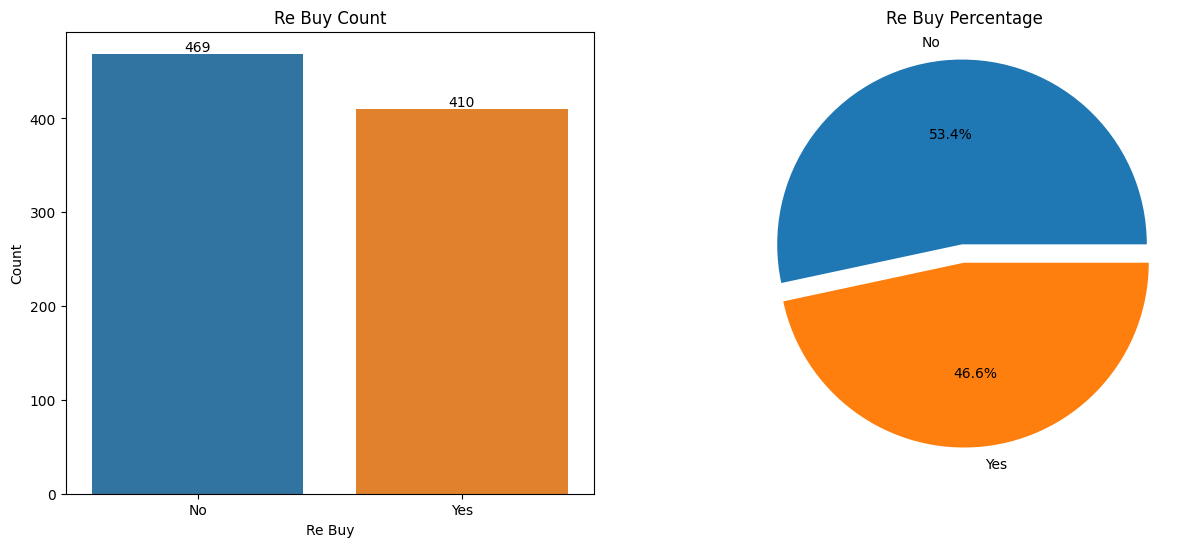

In [75]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='re_buy', data=data)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center")
plt.title('Re Buy Count')
fig.set_xticklabels(['No', 'Yes'])
plt.xlabel('Re Buy')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(data['re_buy'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', explode=[0.1, 0])
plt.title('Re Buy Percentage')
plt.show()

Dataset ini memiliki persentase hampir sama antara konsumen yang membeli kembali (Yes) dengan yang tidak (Tidak)

### 4.2 Sales

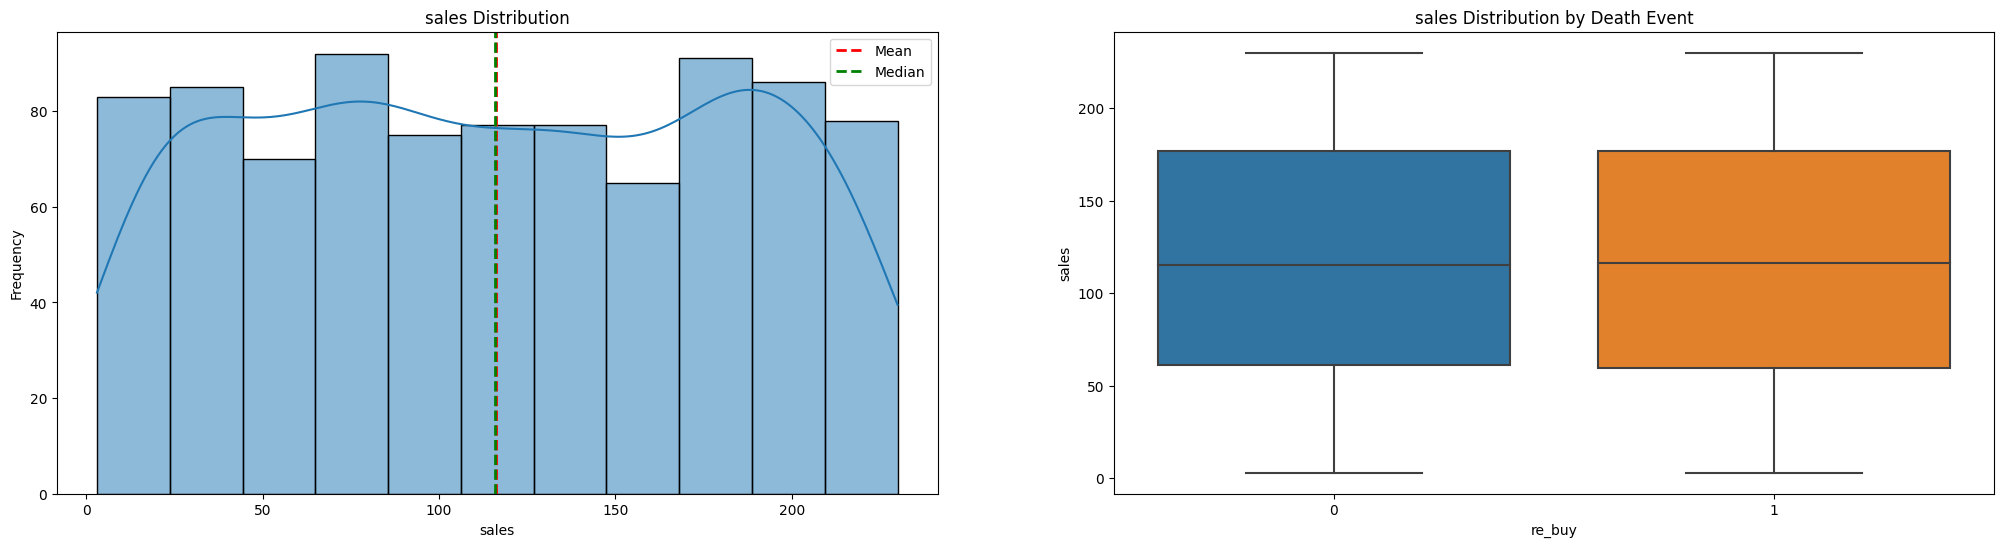

Skewness: 0.0046725396867668325
Minumum sales: 3
Maximum sales: 230


In [76]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='sales', data=data, kde=True)
plt.axvline(data.sales.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.sales.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('sales Distribution')
plt.xlabel('sales')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='re_buy', y='sales', data=data)
plt.title('sales Distribution by Death Event')
plt.xlabel('re_buy')
plt.ylabel('sales')
plt.show()
print(f'Skewness: {data.sales.skew()}')
print(f'Minumum sales: {data.sales.min()}')
print(f'Maximum sales: {data.sales.max()}')

Harga cukup bervariatif yaitu mulai dari 3 hingga 230, untuk persentase sales antara yang re buy dan tidak sama

## 4.3 Product Category

<AxesSubplot: xlabel='count', ylabel='product_category'>

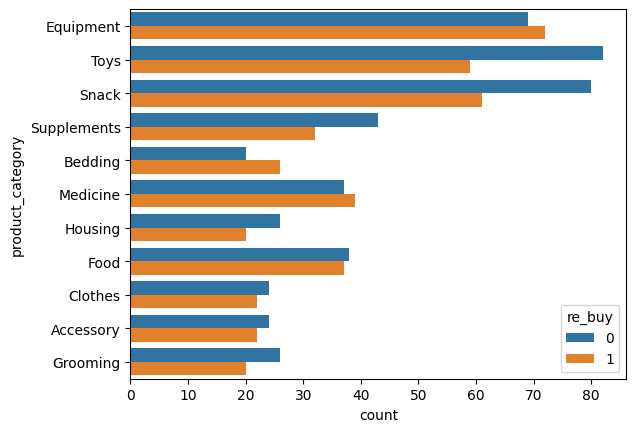

In [77]:
sns.countplot(y='product_category', hue='re_buy', data=data)

Produk kategori yang paling banyak adalah Equipment, toys dan snack. Dari semua kategori persentase membeli kembali produk atau tidak hampir sama

## 4.4 Price

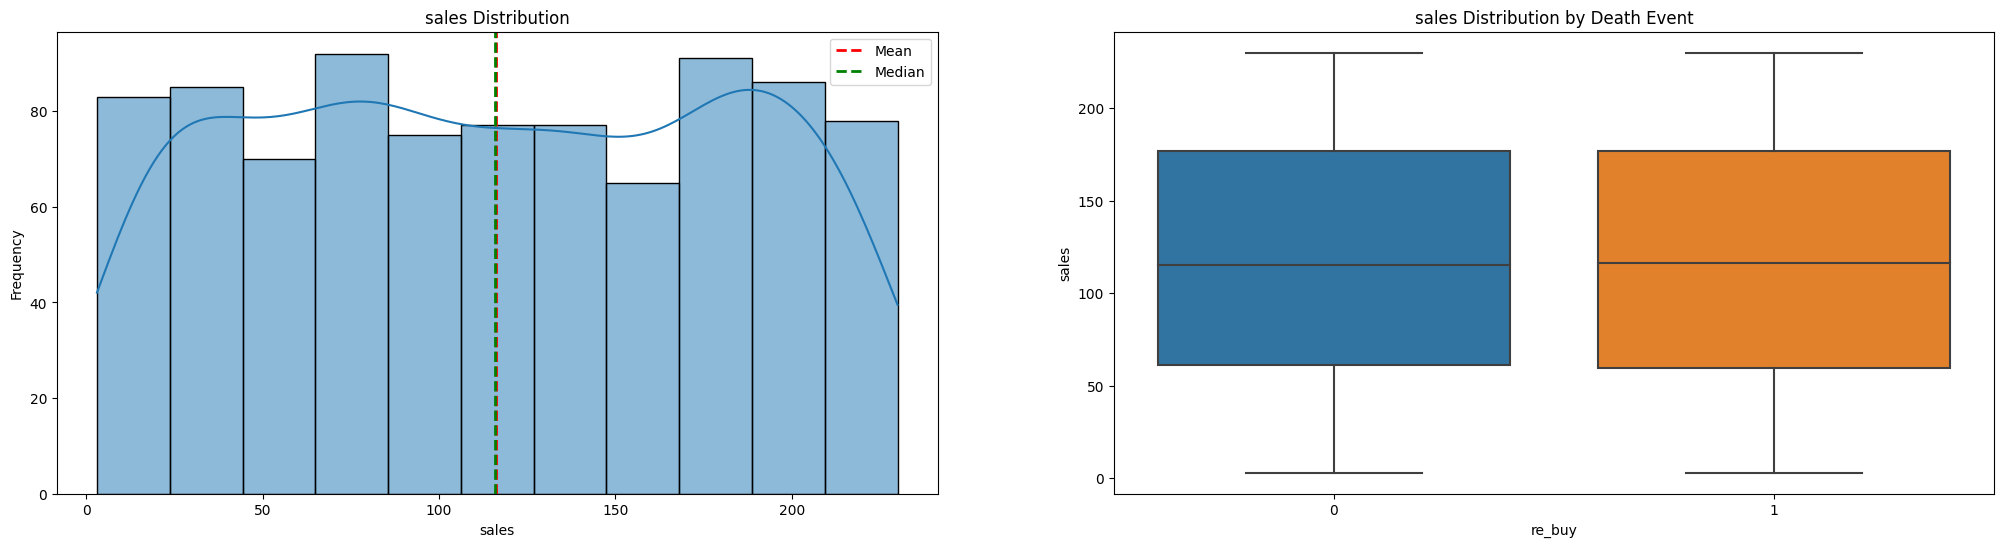

Skewness: 0.0046725396867668325
Minumum sales: 3
Maximum sales: 230


In [78]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='sales', data=data, kde=True)
plt.axvline(data.sales.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.sales.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('sales Distribution')
plt.xlabel('sales')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='re_buy', y='sales', data=data)
plt.title('sales Distribution by Death Event')
plt.xlabel('re_buy')
plt.ylabel('sales')
plt.show()
print(f'Skewness: {data.sales.skew()}')
print(f'Minumum sales: {data.sales.min()}')
print(f'Maximum sales: {data.sales.max()}')

## 4.5 VAP

In [79]:
print('Number of unique values in size: ',data.VAP.nunique())
print('Unique values in size: ', data.VAP.unique())

Number of unique values in size:  2
Unique values in size:  [0 1]


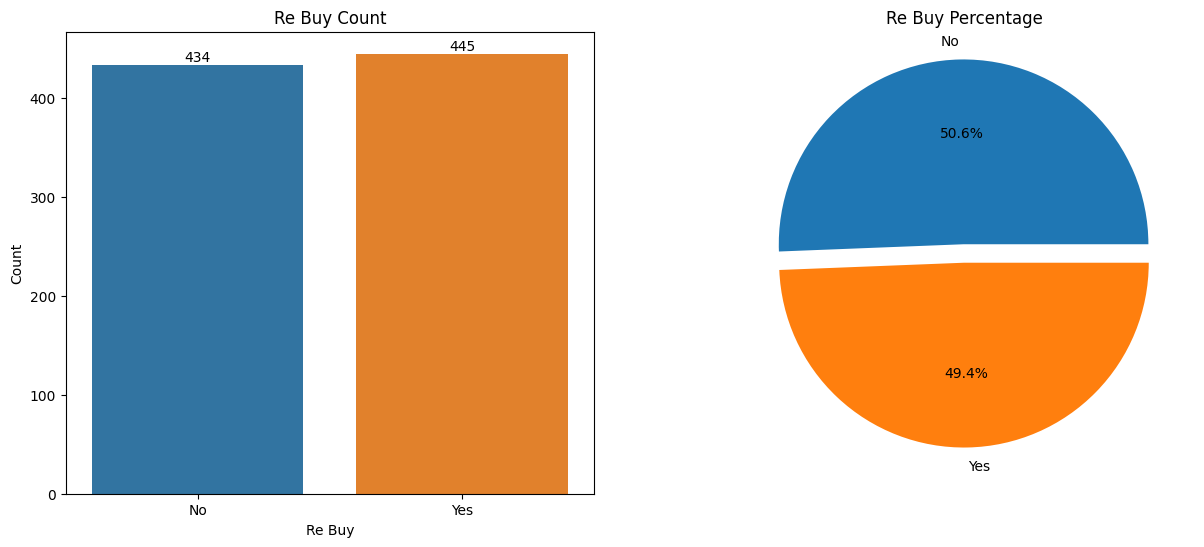

In [80]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='VAP', data=data)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center")
plt.title('Re Buy Count')
fig.set_xticklabels(['No', 'Yes'])
plt.xlabel('Re Buy')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(data['VAP'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', explode=[0.1, 0])
plt.title('Re Buy Percentage')
plt.show()

<AxesSubplot: xlabel='count', ylabel='product_category'>

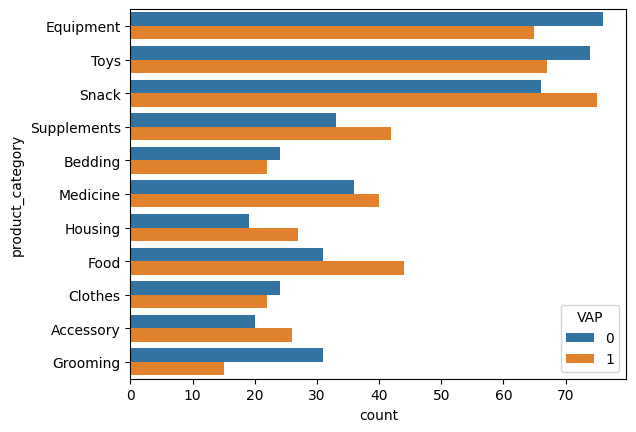

In [81]:
sns.countplot(y='product_category', hue='VAP', data=data)

Pada kolom ini cukup aneh karena hampir semua kategori ada yang harus disetujui oleh dokter terutama pada kolom snack, toys dan equipment. katakanlah biasnya yang perlu persetujuan dokter adalah obat dan mungkin makanan tertentu.

## 4.6 Vendor id

In [82]:
print('Number of unique values in size: ',data.vendor_id.nunique())
print('Unique values in size: ', data.vendor_id.unique())

Number of unique values in size:  879
Unique values in size:  ['VC_1605' 'VC_1132' 'VC_802' 'VC_929' 'VC_749' 'VC_1174' 'VC_945'
 'VC_954' 'VC_1262' 'VC_803' 'VC_1215' 'VC_925' 'VC_1153' 'VC_884'
 'VC_1178' 'VC_1455' 'VC_1342' 'VC_1106' 'VC_1302' 'VC_906' 'VC_1043'
 'VC_744' 'VC_949' 'VC_1126' 'VC_836' 'VC_1029' 'VC_1180' 'VC_1236'
 'VC_1021' 'VC_881' 'VC_1321' 'VC_1590' 'VC_1160' 'VC_1140' 'VC_1456'
 'VC_1078' 'VC_773' 'VC_1586' 'VC_789' 'VC_1503' 'VC_1116' 'VC_1042'
 'VC_1213' 'VC_1071' 'VC_1159' 'VC_1378' 'VC_838' 'VC_1510' 'VC_1478'
 'VC_1205' 'VC_992' 'VC_1041' 'VC_1008' 'VC_1016' 'VC_1395' 'VC_1430'
 'VC_1566' 'VC_1613' 'VC_1074' 'VC_1006' 'VC_1422' 'VC_999' 'VC_1096'
 'VC_1614' 'VC_1383' 'VC_823' 'VC_991' 'VC_1164' 'VC_1315' 'VC_826'
 'VC_1065' 'VC_1553' 'VC_1047' 'VC_1130' 'VC_849' 'VC_993' 'VC_780'
 'VC_781' 'VC_1560' 'VC_1445' 'VC_818' 'VC_938' 'VC_1517' 'VC_845'
 'VC_819' 'VC_1247' 'VC_1090' 'VC_756' 'VC_997' 'VC_754' 'VC_1098'
 'VC_940' 'VC_1146' 'VC_1501' 'VC_903' 'VC_1063

Vendor id memiliki uniqe value sama dengan jumlah data maka data ini di dapat dijadikan feature akan di remove pada saat **EDA**

## 4.7 Pet Size

In [83]:
print('Number of unique values in size: ',data.pet_size.nunique())
print('Unique values in size: ', data.pet_size.unique())

Number of unique values in size:  5
Unique values in size:  ['small' 'large' 'extra_small' 'medium' 'extra_large']


In [84]:
pd.crosstab(data.pet_size, data.pet_type)

pet_type,bird,cat,dog,fish,hamster,rabbit
pet_size,,,,,,
extra_large,5,44,43,5,4,5
extra_small,4,45,44,5,4,5
large,4,44,45,4,5,5
medium,51,171,44,4,5,4
small,5,43,171,52,5,4


Terdapat 6 tipe hewan yaitu bird, cat, dog, fish, hamster, dan rabbit. Apabila dilihat dari crosstab diatas ukurang setiap jenis hewan terbagi menjadi 5 ukuran yaitu extra_small, small, medium, large, extra_large.

### 4.8 Korelasi

<AxesSubplot: >

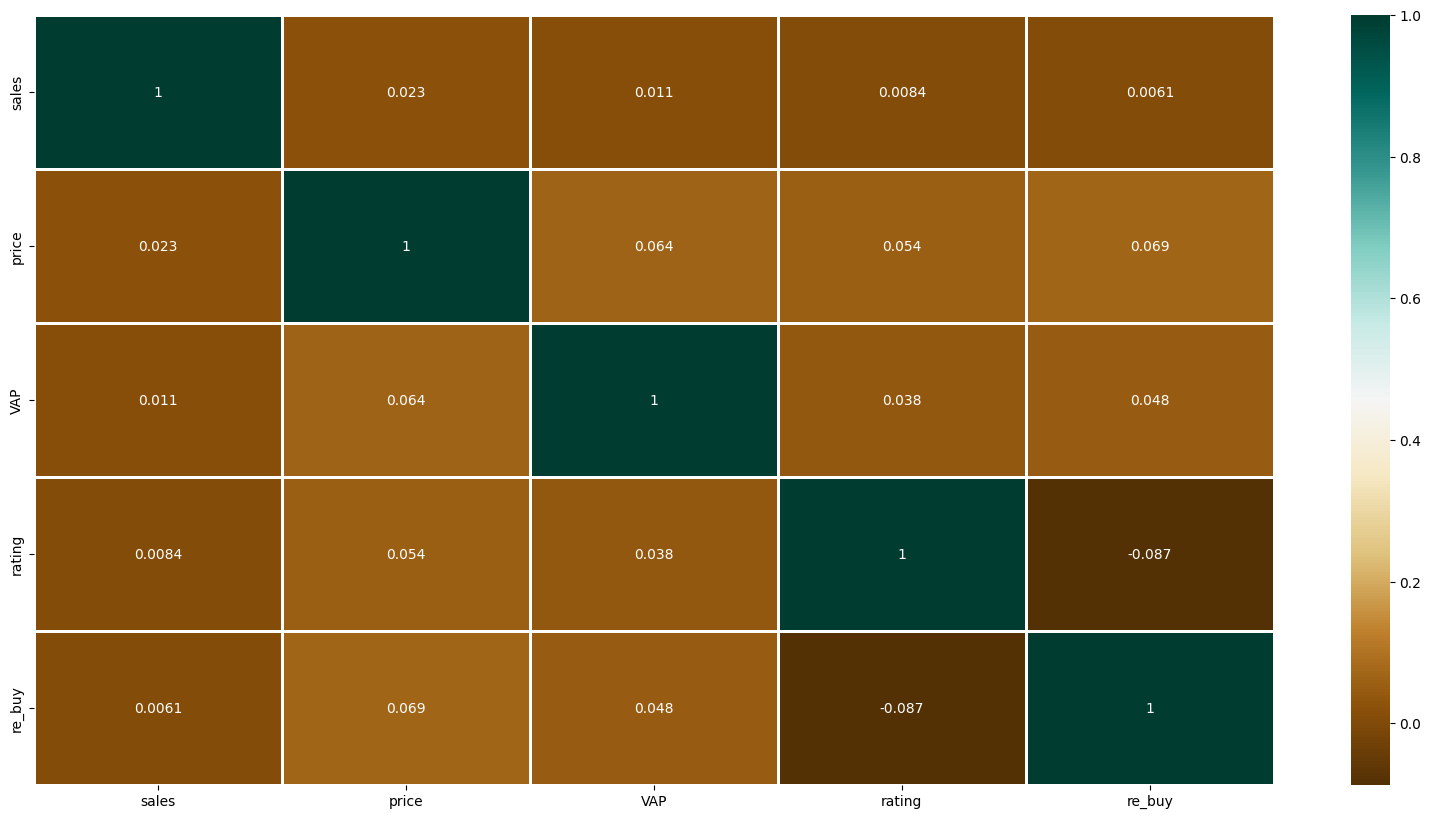

In [85]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),
                cmap = 'BrBG',
                linewidths= 2,
                annot = True)

Berdasarkan hasil korelasi setiap feature tidak memiliki korelasi terhadap target.

# 5. Data Preprocessing

### 5.1 Data Inference

In [86]:
data = data.drop(columns=['vendor_id'])

Dikarenakan memiliki keterbatasan data sehingga kita akan memisahkan model inference yang nantinya akan digunakan untuk test model

In [87]:
data_inf = data.sample(10, random_state=23)
data_inf

,product_category,sales,price,VAP,country,pet_size,pet_type,rating,re_buy
474,Toys,121,3157,0,USA,small,fish,6,0
578,Toys,96,460,0,India,extra_large,dog,9,0
629,Accessory,217,13270,1,India,small,cat,10,1
766,Equipment,161,17150,1,Vietnam,small,fish,7,1
228,Equipment,154,17445,1,Belgium,medium,cat,7,0
457,Supplements,25,11120,0,India,small,cat,10,1
781,Toys,116,8397,0,Belgium,medium,cat,1,1
138,Medicine,49,17059,1,India,large,dog,10,0
807,Snack,102,8761,1,USA,small,fish,6,0
715,Supplements,186,8065,0,India,extra_small,dog,2,1


seteleha mendapatkan data inference langkah selanjutnya merevo data inference

In [88]:
data_train_test = data.drop(data_inf.index)

Selanjutnya mereset index untuk meminimalisir hal-hal yang tidak diinginkan dikemudian hari

In [89]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

### 5.2 Split Data

Membuat training set dan test set dengan perbandingan 8:2, dimana:
- 80% data menjadi **training set**
- 20% data menjadi **test set**

In [90]:
df_train, df_test = train_test_split(data_train_test, test_size=0.2, random_state=23)
df_train

,product_category,sales,price,VAP,country,pet_size,pet_type,rating,re_buy
584,Medicine,112,15958,0,India,extra_large,dog,10,1
284,Medicine,135,8232,0,India,small,dog,1,1
708,Toys,200,16956,0,USA,small,dog,6,0
127,Toys,59,2697,1,Singapore,medium,bird,6,1
575,Housing,110,1982,0,India,medium,dog,3,0
...,...,...,...,...,...,...,...,...,...
31,Equipment,172,18975,1,Singapore,medium,bird,6,1
488,Toys,63,7970,0,India,medium,hamster,10,0
40,Snack,100,9905,1,India,extra_large,cat,10,0
742,Bedding,170,3766,0,India,small,dog,7,0


### 5.3 Handling outlier

#### 5.3.1 Outlier Sales

In [91]:
# Membuat function untuk distribusi data

def histogram_plot(df, variabel):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(df[variabel], kde=True, bins=25)
    plt.title('Histogram')

# boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=df[variabel])
    plt.title('Boxplot')
    plt.show()
    print('\nSkewness Value : ', df[variabel].skew())

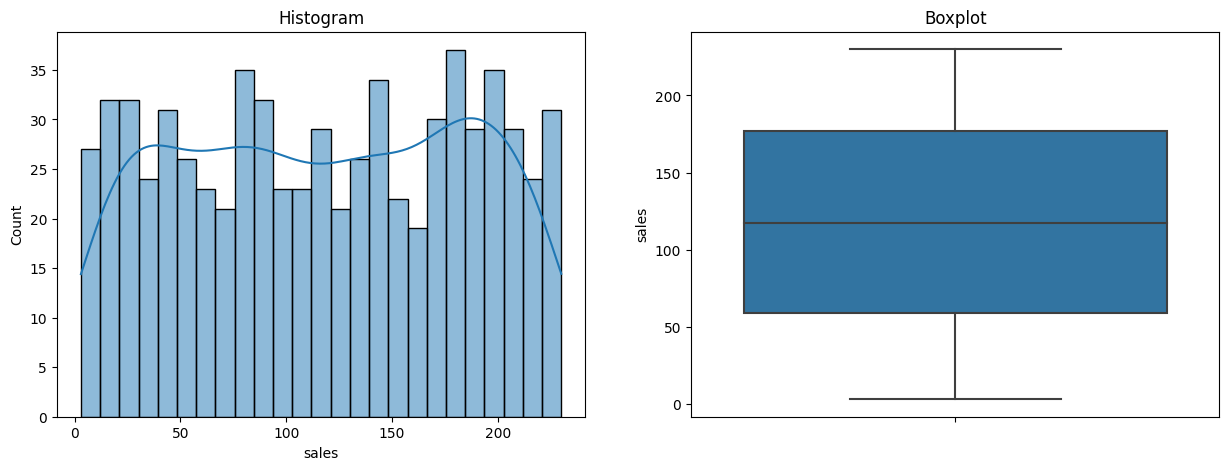


Skewness Value :  -0.028767103642034005


In [92]:
histogram_plot(df_train, 'sales')

Kolom sales memiliki distribusi data normal dan tidak memiliki outlier

#### 5.3.2 Price

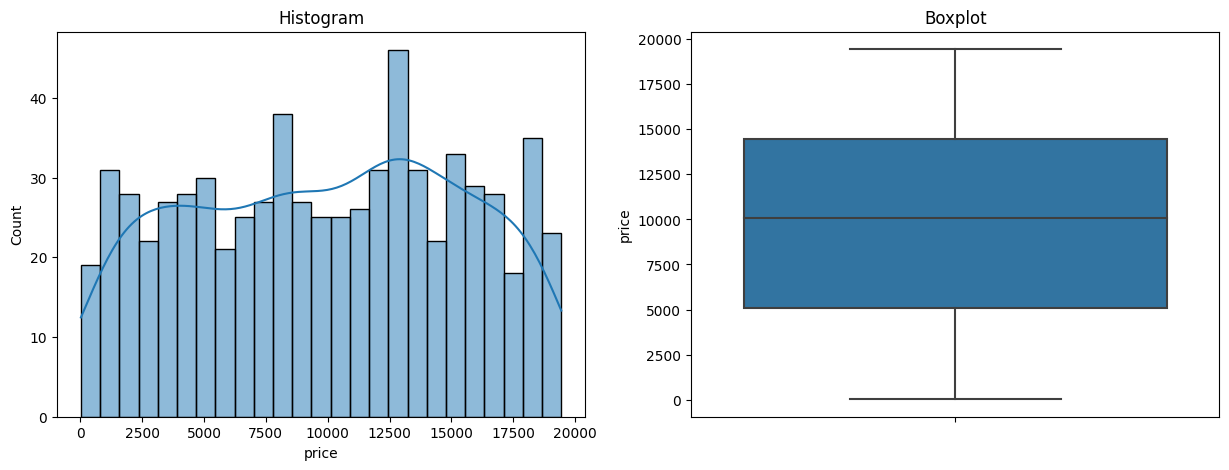


Skewness Value :  -0.06860388881795434


In [93]:
histogram_plot(df_train, 'price')

Kolom price memiliki distribusi normal dan tidak ada outlier

### 5.4 Handling Missing Value

In [94]:
df_train.isna().sum()

product_category    0
sales               0
price               0
VAP                 0
country             0
pet_size            0
pet_type            0
rating              0
re_buy              0
dtype: int64

In [95]:
df_test.isna().sum()

product_category    0
sales               0
price               0
VAP                 0
country             0
pet_size            0
pet_type            0
rating              0
re_buy              0
dtype: int64

Pada Dataset ini tidak memiliki Missing Value

### 5.5 Feature Selection

Pada saat **EDA** vendor_id akan kita remove karena uniqe value sama dengan jumlah row sehingga data tersebut tidak dapat mewakilkan dalam analisis

In [96]:
X_train = df_train.drop(columns='re_buy')
y_train = df_train.re_buy
X_test = df_test.drop(columns='re_buy')
y_test = df_test.re_buy

Seleksi feature akan menggunakan chi2 sebelumnya akan dilakukan scaling dan encoding terlebih dahulu

In [97]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['sales', 'price', 'VAP', 'rating']
Categorical Columns :  ['product_category', 'country', 'pet_size', 'pet_type']


In [98]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

In [99]:
# Feature Scaling using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [100]:
# Feature Encoding using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

In [101]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

In [102]:
X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_test_final_df = pd.DataFrame(X_test_final, columns=[num_columns + cat_columns])

In [103]:
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X_train_final, y_train)
fit.scores_

array([2.26437415e-04, 5.60289536e-01, 2.53552246e+00, 7.17102806e-01,
       1.66144565e+00, 1.81589779e+00, 1.30330186e-02, 2.16222867e-02])

In [104]:
np.round_(fit.scores_)

array([0., 1., 3., 1., 2., 2., 0., 0.])

In [105]:
chi = pd.Series(fit.scores_)
chi.index = X_train_final_df.columns
chi.sort_values(ascending=False)

VAP                 2.535522
country             1.815898
product_category    1.661446
rating              0.717103
price               0.560290
pet_type            0.021622
pet_size            0.013033
sales               0.000226
dtype: float64

Dari hasil seleksi feature diperoleh VAP, country, product_category dan price

In [106]:
X_train = X_train_final_df[['VAP','country','product_category', 'price']]
y_train = df_train.re_buy
X_test = X_test_final_df[['VAP', 'country', 'product_category', 'price']]
y_test = df_test.re_buy

### 5.5 Pipeline

Pada bagian ini akan membuat pipeline untuk melakukan normalisasi (scaling) karena data terdistribusi normal maka menggunakan StandarsScaler dan melakukan encoding menggunakan OrdinalEncoder. Pada bagian ini juga akan membuat Pipeline untuk model. 

Split Numerical and Categorical columns

In [107]:
# Numerical Feature Scaling
num_feature = X_train.select_dtypes(include='number').columns

# Categorical (1) Feature Encoding
cat_feature = X_train.select_dtypes(include='object').columns

In [108]:
# Numerical Feature Pipeline
num_pipe = Pipeline([('scaler', StandardScaler())])

# Categorical Feature Pipeline
cat_pipe = Pipeline([('encoder', OrdinalEncoder())])

Menggabungkan menjadi 1 pipeline preprocessing menggunakan ColumnsTransformer.

In [109]:
# Preprocessing Pipeline
preprocess = ColumnTransformer(transformers=[
    ('num', num_pipe, X_train.select_dtypes(include='number').columns),
    ('cat', cat_pipe, X_train.select_dtypes(include='object').columns),])

In [110]:
X_train_final = preprocess.fit_transform(X_train)

Membuat dataframe

In [111]:
X_train_final_df = pd.DataFrame(X_train_final, columns=[X_train])

In [112]:
X_train_final_df 

,"(VAP,)","(country,)","(product_category,)","(price,)"
0,-1.018883,-0.363502,0.390769,1.103121
1,-1.018883,-0.363502,0.390769,-0.310183
2,-1.018883,2.214394,1.350432,1.285683
3,0.981467,0.667657,1.350432,-1.322691
4,-1.018883,-0.363502,0.070882,-1.453485
...,...,...,...,...
690,0.981467,0.667657,-0.888781,1.655016
691,-1.018883,-0.363502,1.350432,-0.358110
692,0.981467,-0.363502,0.710657,-0.004144
693,-1.018883,-0.363502,-1.528557,-1.127141


# 6. Model Definition

### 6.1 Model definition

Pada bagian ini akan menggunakan 5 Model:
- `log_model` adalah model untuk **Logistic Regression**:  
    - kelebihan: 1. Regresi logistik tidak memiliki asumsi normalitas dan heteroskedastisitas atas variabel bebas yang digunakan dalam model sehingga tidak diperlukan uji asumsi klasik walaupun variabel independen berjumlah lebih dari satu. 2. Variabel independen dalam regresi logistik bisa campuran dari variabel kontinu, distrik, dan dikotomis. 3. Regresi logistik tidak membutuhkan keterbatasan dari variabel independennya. 4. Regresi logistik tidak mengharuskan variabel bebasnya dalam bentuk interval.
    - Kelemahan dari Logistic Regression adalah rentan terhadap underfitting pada dataset yang kelasnya tidak seimbang, sehingga akan menghasilkan akurasi yang rendah.[link](https://www.neliti.com/id/publications/90242/resampling-logistic-regression-untuk-penanganan-ketidakseimbangan-class-pada-pre#:~:text=Kelemahan%20dari%20Logistic%20Regression%20adalah,akan%20menghasilkan%20akurasi%20yang%20rendah.)

- `svc_model` adalah model untuk **Support Vector Machine** : SVM menggunakan teknik yang disebut trik kernel di mana kernel mengambil ruang input berdimensi rendah dan mengubahnya menjadi ruang berdimensi lebih tinggi
    - Kelebihan: Pengklasifikasi SVM menawarkan akurasi tinggi dan bekerja dengan baik dengan ruang dimensi tinggi. SVM pengklasifikasi pada dasarnya menggunakan subset dari poin pelatihan sehingga hasilnya menggunakan memori yang sangat sedikit.
    - Kelemahan pengklasifikasi SVM memiliki waktu pelatihan yang tinggi sehingga dalam praktiknya tidak cocok untuk kumpulan data yang besar. Lain kerugiannya adalah pengklasifikasi SVM tidak berfungsi dengan baik dengan kelas yang tumpang tindih
- `tree` adalah model untuk Decisson Tree: membuat keputusan dengan struktur seperti pohon yang memodelkan kemungkinan hasil, biaya sumber daya, utilitas dan kemungkinan konsekuensi atau resiko. 
    - Kelebihan: Mudah dibaca dan ditafsirkan  tanpa perlu pengetahuan statistik, Mudah disiapkan tanpa harus menghitung dengan perhitungan yang rumit, Proses Data Cleaning cenderung lebih sedikit, kasus nilai yang hilang dan outlier kurang signifikan pada data decision tree.
    - Kelemahan: Sifat tidak stabil, ini menjadi salah satu keterbatasan dari algoritma decision tree ketika terdapat perubahan kecil pada data dapat menghasilkan perubahan besar dalam struktur pohon keputusan, Kurang efektif dalam memprediksi hasil dari variabel kontinu. [link](https://dqlab.id/pahami-metode-decision-tree-sebagai-algoritma-data-science#:~:text=Agar%20semakin%20lebih%20kenal%20dengan,3)%20Proses%20Data%20Cleaning%20cenderung)
- `forest` adalah model untuk Random Forest: u kumpulan dari beberapa tree, dimana
masing-masing tree bergantung pada nilai piksel pada tiap vector yang diambil
secara acak dan independen
    - Kelebihan: dapat mengatasi noise dan missing value serta dapat mengatasi data dalam jumlah yang besar.
    - kekurangan pada algoritma Random Forest yaitu interpretasi yang sulit dan membutuhkan tuning model yang tepat untuk data. 
- `knn` adalah model untuk K-Nearest Neighbors
    - Kelebihan: Mudah diterapkan, Mudah beradaptasi, Memiliki sedikit hyperparameter
    - Kekurangan: Tidak berfungsi dengan baik pada dataset berukuran besar, Kurang cocok untuk dimensi tinggi, Perlu penskalaan fitur, Sensitif terhadap noise data, missing values dan outliers

### 6.2 Modeling 

In [113]:
# Logistic Regression Pipeline
logistic_pipe = Pipeline([('preprocessing', preprocess), ('classifier', LogisticRegression())])

# Support Vector Machine Pipeline
svc_pipe = Pipeline([('preprocessing', preprocess), ('classifier', SVC())])

# Decision Tree Pipeline
tree_pipe = Pipeline([('preprocessing', preprocess), ('classifier', DecisionTreeClassifier())])

# Random Forest Pipeline
forest_pipe = Pipeline([('preprocessing', preprocess), ('classifier', RandomForestClassifier())])

# K-Nearest Neighbors Pipeline
knn_pipe = Pipeline([('preprocessing', preprocess), ('classifier', KNeighborsClassifier())])

Membuat dictionary parameter

In [114]:
# Logistic Regression
logistic_params = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                   'classifier__penalty': ['l1', 'l2'],
                   'classifier__solver': ['liblinear', 'saga'],
                   'classifier__max_iter': [1000, 10000]}

# SVC
svc_params = {'classifier__C': [0.1, 1, 10], 
              'classifier__kernel': ['linear', 'rbf', 'poly'],
              'classifier__gamma': ['auto', 'scale']}

# Decision Tree
tree_params = {'classifier__criterion': ['gini', 'entropy'],
               'classifier__max_depth': [2, 3, 4, 5, 6], 
               'classifier__min_samples_split': [2, 3, 4, 5, 6],
               'classifier__min_samples_leaf': [2, 3, 4, 5, 6]}

# Random Forest
forest_params = {'classifier__criterion': ['gini', 'entropy'],
                 'classifier__max_features': ['auto', 'sqrt', 'log2'],
                 'classifier__n_estimators': [100, 150, 200, 250, 300]}

# KNN
knn_params = {'classifier__n_neighbors': [3, 5, 7, 9], 
              'classifier__weights': ['uniform', 'distance'], 
              'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [115]:
logistic = GridSearchCV(logistic_pipe, param_grid=logistic_params, cv=5, n_jobs=-1).fit(X_train, y_train)
svc = GridSearchCV(svc_pipe, param_grid=svc_params, cv=5, n_jobs=-1).fit(X_train, y_train)
tree = GridSearchCV(tree_pipe, param_grid=tree_params, cv=5, n_jobs=-1).fit(X_train, y_train)
forest = GridSearchCV(forest_pipe, param_grid=forest_params, cv=5, n_jobs=-1).fit(X_train, y_train)
knn = GridSearchCV(knn_pipe, param_grid=knn_params, cv=5, n_jobs=-1).fit(X_train, y_train)

# 7. Model Training

### 7.1 Time Training

In [116]:
%timeit logistic_pipe.fit(X_train, y_train)
%timeit svc_pipe.fit(X_train, y_train)
%timeit tree_pipe.fit(X_train, y_train)
%timeit forest_pipe.fit(X_train, y_train)
%timeit knn_pipe.fit(X_train, y_train)

7.09 ms ± 247 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
26.1 ms ± 329 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
7.28 ms ± 592 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
217 ms ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.05 ms ± 486 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [117]:
best_logistic = logistic.best_estimator_
print('-------Logistic Regression Best Hyperparameter-------')
print(logistic.best_params_)

best_svc = svc.best_estimator_
print('\n-------Support Vector Machine Best Hyperparameter-------')
print(svc.best_params_)

best_tree = tree.best_estimator_
print('\n-------Decision Tree Best Hyperparameter-------')
print(tree.best_params_)

best_forest = forest.best_estimator_
print('\n-------Random Forest Best Hyperparameter-------')
print(forest.best_params_)

best_knn = knn.best_estimator_
print('\n-------K-Nearest Neighbors Best Hyperparameter-------')
print(knn.best_params_)

-------Logistic Regression Best Hyperparameter-------
{'classifier__C': 0.1, 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}

-------Support Vector Machine Best Hyperparameter-------
{'classifier__C': 1, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}

-------Decision Tree Best Hyperparameter-------
{'classifier__criterion': 'entropy', 'classifier__max_depth': 2, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2}

-------Random Forest Best Hyperparameter-------
{'classifier__criterion': 'entropy', 'classifier__max_features': 'auto', 'classifier__n_estimators': 100}

-------K-Nearest Neighbors Best Hyperparameter-------
{'classifier__algorithm': 'auto', 'classifier__n_neighbors': 9, 'classifier__weights': 'distance'}


### 7.2 Model Training

In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv_log_model = cross_val_score(logistic_pipe, X_train, y_train, cv=5, scoring="recall")
cv_svm_model = cross_val_score(svc_pipe, X_train, y_train, cv=5, scoring="recall")
cv_dt_model = cross_val_score(tree_pipe, X_train, y_train, cv=5, scoring="recall")
cv_rf_model = cross_val_score(forest_pipe, X_train, y_train, cv=5, scoring="recall")
cv_knn_model = cross_val_score(knn_pipe, X_train, y_train, cv=5, scoring="recall")

name_model = []
cv_scores=0
for cv,name in zip([cv_log_model,cv_svm_model,cv_dt_model,cv_rf_model,cv_knn_model],['logistic_pipe','svc_pipe','tree_pipe','forest_pipe','knn_pipe']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

logistic_pipe
recall - All - Cross Validation  :  [0.3030303  0.33846154 0.41538462 0.43076923 0.36923077]
recall - Mean - Cross Validation :  0.3713752913752914
recall - Std - Cross Validation  :  0.04737807968768073
recall - Range of Test-Set       :  0.3239972116876107 - 0.4187533710629721
--------------------------------------------------
svc_pipe
recall - All - Cross Validation  :  [0.22727273 0.29230769 0.15384615 0.33846154 0.23076923]
recall - Mean - Cross Validation :  0.24853146853146857
recall - Std - Cross Validation  :  0.06282756597707527
recall - Range of Test-Set       :  0.18570390255439329 - 0.31135903450854385
--------------------------------------------------
tree_pipe
recall - All - Cross Validation  :  [0.40909091 0.46153846 0.55384615 0.41538462 0.43076923]
recall - Mean - Cross Validation :  0.45412587412587413
recall - Std - Cross Validation  :  0.05305402271852191
recall - Range of Test-Set       :  0.40107185140735224 - 0.507179896844396
---------------------

Best model yang diperoleh dengan menggunakan Cross Validatian adalah tree_pipe. Selanjutnya akan melakukan hyperparameter tuning dengan GridSearchCV()

### 7.3 Model Tuning

# 8. Model Evaluation

### 8.1 Evaluasi

Model yang sudah dilakukan training akan dievaluasi menggunakan Metric evaluation F1-score dan ROC-AUC

Membuat dataframe

In [119]:
evaluations = pd.DataFrame(columns=['model', 'training_score', 'test_score', 'macro_f1_score', 'roc_auc_score'])

In [120]:
evaluations.loc[0] = ['Logistic Regression', round(best_logistic.score(X_train, y_train), 3), round(best_logistic.score(X_test, y_test), 3), round(f1_score(y_test, best_logistic.predict(X_test), average='macro'), 3), round(roc_auc_score(y_test, best_logistic.predict(X_test)), 3)]
evaluations.loc[1] = ['SVC', round(best_svc.score(X_train, y_train), 3), round(best_svc.score(X_test, y_test), 3), round(f1_score(y_test, best_svc.predict(X_test), average='macro'), 3), round(roc_auc_score(y_test, best_svc.predict(X_test)), 3)]
evaluations.loc[2] = ['Decision Tree', round(best_tree.score(X_train, y_train), 3), round(best_tree.score(X_test, y_test), 3), round(f1_score(y_test, best_tree.predict(X_test), average='macro'), 3), round(roc_auc_score(y_test, best_tree.predict(X_test)), 3)]
evaluations.loc[3] = ['Random Forest', round(best_forest.score(X_train, y_train), 3), round(best_forest.score(X_test, y_test), 3), round(f1_score(y_test, best_forest.predict(X_test), average='macro'), 3), round(roc_auc_score(y_test, best_forest.predict(X_test)), 3)]
evaluations.loc[4] = ['KNN', round(best_knn.score(X_train, y_train), 3), round(best_knn.score(X_test, y_test), 3), round(f1_score(y_test, best_knn.predict(X_test), average='macro'), 3), round(roc_auc_score(y_test, best_knn.predict(X_test)), 3)]

In [121]:
logistic_false_positive_rate_test, logistic_true_positive_rate_test, logistic_thresholds_test = roc_curve(y_test, best_logistic.predict(X_test))
svc_false_positive_rate_test, svc_true_positive_rate_test, svc_thresholds_test = roc_curve(y_test, best_svc.predict(X_test))
tree_false_positive_rate_test, tree_true_positive_rate_test, tree_thresholds_test = roc_curve(y_test, best_tree.predict(X_test))
forest_false_positive_rate_test, forest_true_positive_rate_test, forest_thresholds_test = roc_curve(y_test, best_forest.predict(X_test))
knn_false_positive_rate_test, knn_true_positive_rate_test, knn_thresholds_test = roc_curve(y_test, best_knn.predict(X_test))

confusions = [confusion_matrix(y_test, best_logistic.predict(X_test)),
              confusion_matrix(y_test, best_svc.predict(X_test)),
              confusion_matrix(y_test, best_tree.predict(X_test)),
              confusion_matrix(y_test, best_forest.predict(X_test)),
              confusion_matrix(y_test, best_knn.predict(X_test)),]

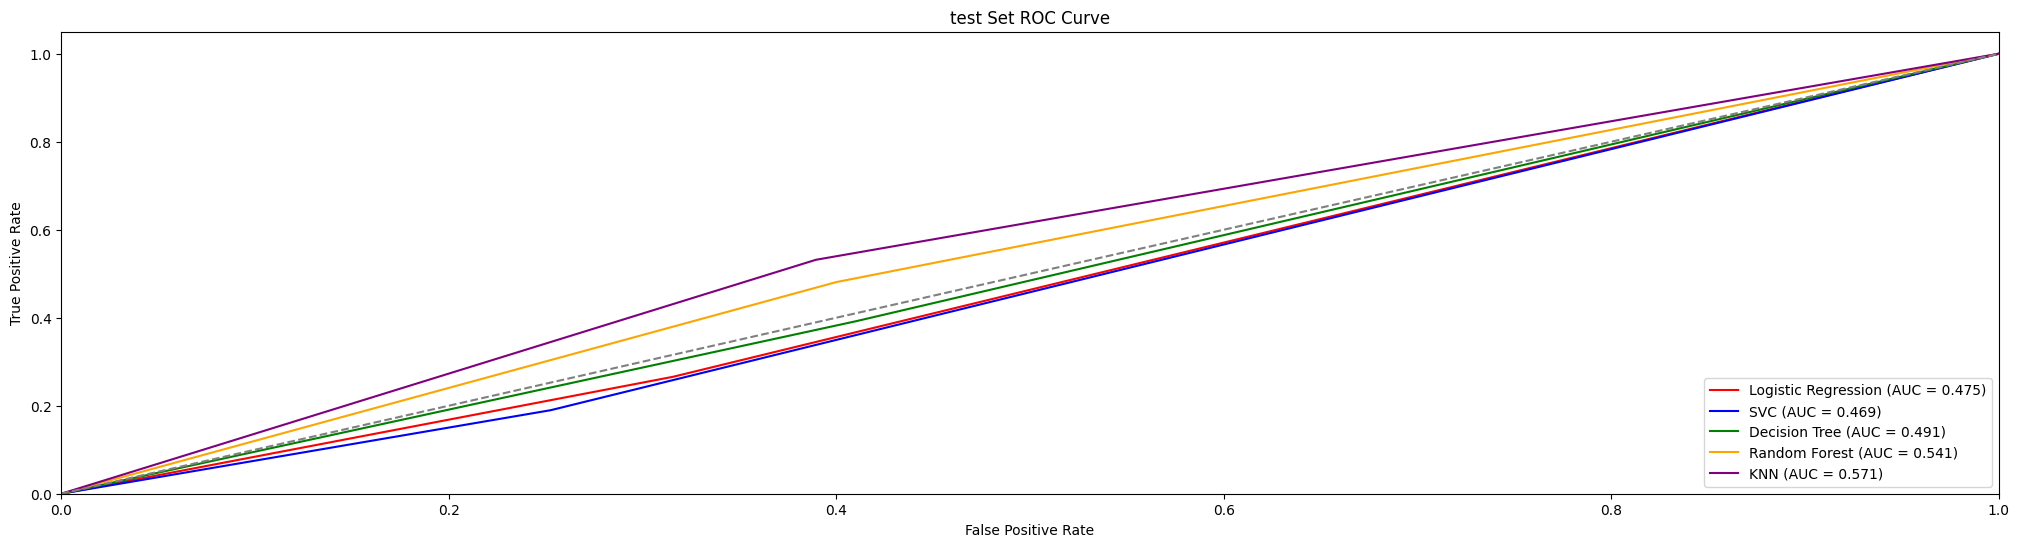

In [122]:
plt.figure(figsize=(25, 6))
plt.plot(logistic_false_positive_rate_test, logistic_true_positive_rate_test, color='red', label=f'Logistic Regression (AUC = {roc_auc_score(y_test, best_logistic.predict(X_test)):.3f})')
plt.plot(svc_false_positive_rate_test, svc_true_positive_rate_test, color='blue', label=f'SVC (AUC = {roc_auc_score(y_test, best_svc.predict(X_test)):.3f})')
plt.plot(tree_false_positive_rate_test, tree_true_positive_rate_test, color='green', label=f'Decision Tree (AUC = {roc_auc_score(y_test, best_tree.predict(X_test)):.3f})')
plt.plot(forest_false_positive_rate_test, forest_true_positive_rate_test, color='orange', label=f'Random Forest (AUC = {roc_auc_score(y_test, best_forest.predict(X_test)):.3f})')
plt.plot(knn_false_positive_rate_test, knn_true_positive_rate_test, color='purple', label=f'KNN (AUC = {roc_auc_score(y_test, best_knn.predict(X_test)):.3f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('test Set ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [123]:
evaluations.sort_values(by='roc_auc_score', ascending=False)

,model,training_score,test_score,macro_f1_score,roc_auc_score
4,KNN,1.000,0.575,0.571,0.571
3,Random Forest,1.000,0.546,0.540,0.541
2,Decision Tree,0.573,0.500,0.489,0.491
0,Logistic Regression,0.542,0.494,0.460,0.475
1,SVC,0.583,0.494,0.436,0.469


Karnea KNN mendapatkan score paling tinggi maka akan dilakukan evaluasi kembali dengan best parameter yang sudah didapatkan sebelumnya

In [124]:
print('Training Score:', best_forest.score(X_train, y_train))
print('test Score:', best_forest.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, best_forest.predict(X_test)))
best_forest_confusion_matrix = confusion_matrix(y_test, best_forest.predict(X_test))

Training Score: 1.0
test Score: 0.5459770114942529
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.60      0.59        95
           1       0.50      0.48      0.49        79

    accuracy                           0.55       174
   macro avg       0.54      0.54      0.54       174
weighted avg       0.54      0.55      0.55       174



In [125]:
print('Training Score:', best_knn.score(X_train, y_train))
print('test Score:', best_knn.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, best_knn.predict(X_test)))
best_knn_confusion_matrix = confusion_matrix(y_test, best_knn.predict(X_test))

Training Score: 1.0
test Score: 0.5747126436781609
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.61      0.61        95
           1       0.53      0.53      0.53        79

    accuracy                           0.57       174
   macro avg       0.57      0.57      0.57       174
weighted avg       0.57      0.57      0.57       174



In [126]:
print('Training Score:', best_tree.score(X_train, y_train))
print('test Score:', best_tree.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, best_tree.predict(X_test)))
best_tree_confusion_matrix = confusion_matrix(y_test, best_tree.predict(X_test))

Training Score: 0.5726618705035971
test Score: 0.5
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.59      0.56        95
           1       0.44      0.39      0.42        79

    accuracy                           0.50       174
   macro avg       0.49      0.49      0.49       174
weighted avg       0.50      0.50      0.50       174



### 8.2 Model Analysis

Dari kelima model terdapat 2 model yang mengalami overfitting yaitu KNN dan Random forest, mereka dapat memprediksi 100% pada train set sedangkan hanya sekitar 50% pada saat test set ini sanagt tidak seimbang. ketiga model lainnya memiliki nilai yang rendah juga. yang paling rendah adalah svc dengan f1 score dan roc auc adalah 0.436	dan 0.469. berdasarkan time yang paling cepat adalah knn yaitu 6.8 dan yang paling lama adalah random fores yaitu 241 . 

**Note** Model sudah di train dan eror namun hasilnya tidak berbeda jauh sehingaa memutuskan menggunakan parameter terbaik berdasarka grid search.

# 9. Model Saving

In [127]:
# Save the Files

import joblib
import json

with open('model_log_reg.pkl', 'wb') as file_1:
  joblib.dump(logistic_pipe, file_1)

with open('model_tree_reg.pkl', 'wb') as file_1:
  joblib.dump(tree_pipe, file_1)

with open('model_forest_reg.pkl', 'wb') as file_1:
  joblib.dump(forest_pipe, file_1)

with open('model_knn_reg.pkl', 'wb') as file_1:
  joblib.dump(knn_pipe, file_1)

with open('model_svc_reg.pkl', 'wb') as file_1:
  joblib.dump(svc_pipe, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('model_encoder.pkl', 'wb') as file_3:
  joblib.dump(encoder, file_3)

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

with open('cat_.txt', 'w') as file_5:
  json.dump(cat_columns, file_5)

# 10. Model Inference

In [128]:
data_inf

,product_category,sales,price,VAP,country,pet_size,pet_type,rating,re_buy
0,Toys,121,3157,0,USA,small,fish,6,0
1,Toys,96,460,0,India,extra_large,dog,9,0
2,Accessory,217,13270,1,India,small,cat,10,1
3,Equipment,161,17150,1,Vietnam,small,fish,7,1
4,Equipment,154,17445,1,Belgium,medium,cat,7,0
5,Supplements,25,11120,0,India,small,cat,10,1
6,Toys,116,8397,0,Belgium,medium,cat,1,1
7,Medicine,49,17059,1,India,large,dog,10,0
8,Snack,102,8761,1,USA,small,fish,6,0
9,Supplements,186,8065,0,India,extra_small,dog,2,1


In [129]:
X_inf = data_inf.drop(['re_buy'], axis=1)
y_inf = data_inf['re_buy']

In [130]:
forest_pred = pd.DataFrame(best_forest.predict(X_test))
knn_pred = pd.DataFrame(best_knn.predict(X_test))

preds = pd.concat([data_inf['re_buy'].reset_index(drop=True),  forest_pred, knn_pred], axis=1)
preds.columns = ['Actual', 'Forest', 'KNN']

# Showing the top 5 rows of the predictions dataframe where actual values are 1
preds[preds.Actual == 1].head(5)

,Actual,Forest,KNN
2,1.0,1,0
3,1.0,1,1
5,1.0,0,0
6,1.0,0,1
9,1.0,1,1


# 11. Pengambilan Kesimpulan

### Overall Analis

Based on EDA:
    - Dataset Dataset yang digunakan adalah data pet store record pada tahun 2020 yang terdiri dari 879 dengan jumlah kolom 11
    - Dataset ini merupakan classifikasi dimana nila 0 artinya tidak membeli ulang, dan 1 artinya membeli ulang
    - Terdapat beberapa kategori produk seperti equipment, snack, medicine, toys dan laiinya
    - Ukuran hewan disesuikan dengan jenis hewannya
    - Berdasarkan heatmap semua kategori sangat lemah korelasinya atau bisa dikatakan tidak adanya korelasi

Based on Model:
Dari kelima model yang digunakan dapat disimpulkan:
    - Model yang memiliki waktu time trining paling cepat adalah KNN paling lama Random forest
    - akurasi paling besar adalah KNN yaitu 0.57
    - Nilai Recall dan F1 score adalah KNN yaitu 0.57
    - Nilai roc auc yang tertinggi adalah KNN yaitu 0.57
    - Jika dilihat KNN memiliki nilai paling bagus diatara yang lainnya namun harus diingat bahwa KNN overfitting atara train dan testnya cukup jauh

Improvment:
    - Model yang diperoleh bisa dikatan belum dapat dipercaya dilihat berdasarkan tingkat akurasi yang rendah selain itu nilai recall dan f1 yang rendah juga. Mungkin beberapa model sensitif terhadap outlier namun berdasarkan EDA dan Preprocessing data ini tidak memiliki outlier sehingga saya asumsikan karena kurangnya data atau data yang dimiliki sangat sedikit sehinga data tersebut masih belum bisa mewakilkan data untuk diprediksi.
    - untuk meningkatkan model: menambahkan jumlah data, menambahkan feature seperti diskon, pelayanan konsumen, tingkat kepuasan konseumen, mencari algoritma lain yang lebih tepat dan parameter yang tepat.

### Referensi

- http://skripsi.narotama.ac.id/files/KECENDERUNGAN%20PEMBELIAN%20KEMBALI%20BERBAGAI%20FAKTOR%20PENENTU%20DAN%20PRODUK%20FASTFOOD.pdf
- https://www.trivusi.web.id/2022/06/algoritma-knn.html
- https://towardsdatascience.com how-to-use-sklearn-pipelines-for-ridiculously-neat-code-a61ab66ca90d